# ACADEMIC INTERGITY STATEMENT
"I certify that the code and data in this assignment were generated independently, 
using only the tools and resources defined in the course and that I (we) did not receive 
any external help, coaching or contributions during the production of this work."

# Part III: Building a CNN 

In [1]:
import statistics as st
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout

import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report 

# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

from tensorflow.keras.utils import to_categorical

In [16]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

In [11]:
print("picture size: "+ str(trainX.shape[1])+"x"+str(trainX.shape[2]))
print("total train picture amount "+str(trainX.shape[0]))
print("total test picture amount "+str(testX.shape[0]))
print("category types "+str(max(trainy)-min(trainy)+1))
print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)

picture size: 28x28
total train picture amount 60000
total test picture amount 10000
category types 10
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


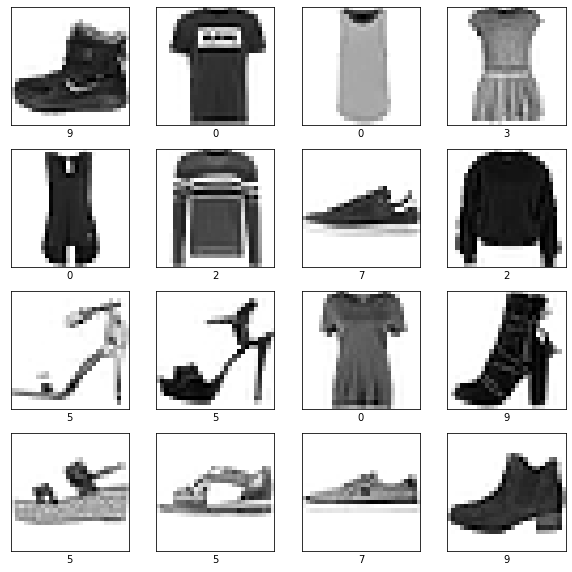

In [231]:
classN = range(10)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(classN[trainy[i]])
plt.show()

In [17]:
model = tf.keras.models.Sequential()
#first layer: convolution layer
model.add(tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='relu', 
        input_shape=(28, 28, 1) 
    )
)
#Maxpool layer
model.add(tf.keras.layers.MaxPooling2D(
       pool_size=(2, 2), 
       strides=(2, 2)
    )
)

#dropout to prevent from overfitting 
model.add(tf.keras.layers.Dropout(
       rate=0.25 
    )
)
#flatten layer
model.add(tf.keras.layers.Flatten())
#fully connected
model.add(tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

#output with 10 categories
model.add(tf.keras.layers.Dense(
       units=10, 
       activation='softmax' 
    )
)
    #loss
model.compile(
loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
optimizer=tf.keras.optimizers.Adam(), # optimizer function
metrics=['accuracy'] # reporting metric
)



In [18]:
# model structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

Epoch 1/10
235/235 [==============================] - 20s 83ms/step - loss: 0.1007 - accuracy: 0.9642 - val_loss: 0.4217 - val_accuracy: 0.9077
Epoch 2/10
235/235 [==============================] - 21s 87ms/step - loss: 0.0938 - accuracy: 0.9664 - val_loss: 0.4281 - val_accuracy: 0.9106
Epoch 3/10
235/235 [==============================] - 21s 88ms/step - loss: 0.0894 - accuracy: 0.9669 - val_loss: 0.4342 - val_accuracy: 0.9060
Epoch 4/10
235/235 [==============================] - 22s 95ms/step - loss: 0.0889 - accuracy: 0.9676 - val_loss: 0.4543 - val_accuracy: 0.9020
Epoch 5/10
235/235 [==============================] - 22s 94ms/step - loss: 0.0886 - accuracy: 0.9680 - val_loss: 0.4430 - val_accuracy: 0.9081
Epoch 6/10
235/235 [==============================] - 22s 95ms/step - loss: 0.0860 - accuracy: 0.9693 - val_loss: 0.4296 - val_accuracy: 0.9084
Epoch 7/10
235/235 [==============================] - 23s 96ms/step - loss: 0.0835 - accuracy: 0.9696 - val_loss: 0.4473 - val_accuracy:

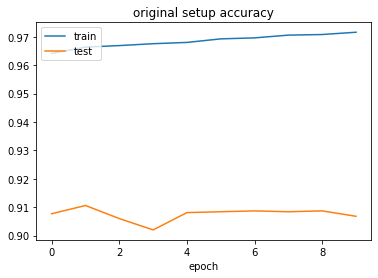

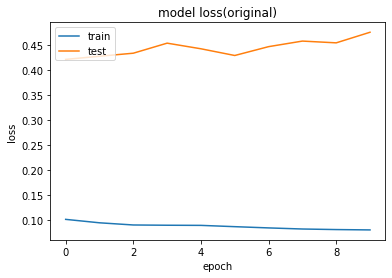

In [25]:
#fix Keras error massage
tf.config.run_functions_eagerly(True)
history = model.fit(trainX, trainy, batch_size=256, epochs=10, validation_data=(testX, testy), verbose=1) 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('original setup accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss(original)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

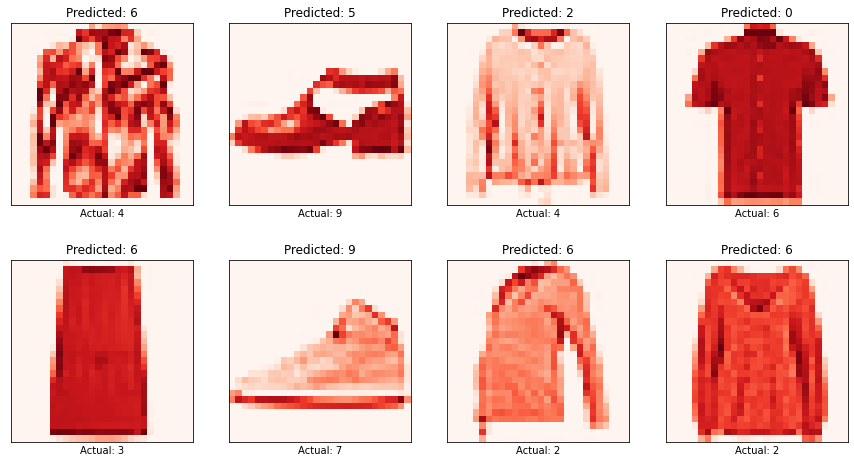

In [30]:
# predicted_classes = model.predict_classes(testx)
predict_x=model.predict(testX) 
predicted_classes=np.argmax(predict_x,axis=1)
incorrect = np.nonzero(predicted_classes!=testy)[0]

# Display the first 16 incorrectly classified images from the test data set
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testX[incorrect].reshape(28, 28), cmap="Reds")
    plt.title("Predicted: {}".format(predicted_classes[incorrect]))
    plt.xlabel("Actual: {}".format(testy[incorrect]))

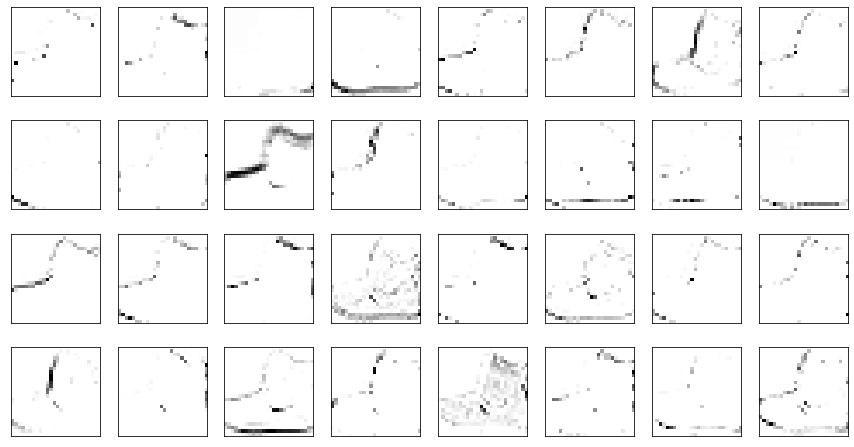

In [53]:
# The layer we want to copy from the trained CNN
layer_name = 'conv2d_1' 
layer_dict = {layer.name : layer for layer in model.layers}
modelslice = tf.keras.Model(inputs=model.inputs, outputs=layer_dict[layer_name].output)

image = trainX[0] 
image = np.expand_dims(image, axis=0)
feature_maps = modelslice.predict(image)
plt.figure(figsize=(15, 8))
    
# We are assuming that we have 32 feature maps
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i-1], cmap=plt.cm.binary)

Epoch 1/10
235/235 [==============================] - 46s 196ms/step - loss: 3.1447 - accuracy: 0.7227 - val_loss: 0.5111 - val_accuracy: 0.8297
Epoch 2/10
235/235 [==============================] - 46s 198ms/step - loss: 0.4835 - accuracy: 0.8354 - val_loss: 0.4061 - val_accuracy: 0.8655
Epoch 3/10
235/235 [==============================] - 46s 195ms/step - loss: 0.3913 - accuracy: 0.8640 - val_loss: 0.3711 - val_accuracy: 0.8735
Epoch 4/10
235/235 [==============================] - 44s 185ms/step - loss: 0.3399 - accuracy: 0.8794 - val_loss: 0.3376 - val_accuracy: 0.8846
Epoch 5/10
235/235 [==============================] - 44s 188ms/step - loss: 0.3068 - accuracy: 0.8900 - val_loss: 0.3342 - val_accuracy: 0.8835
Epoch 6/10
235/235 [==============================] - 31s 133ms/step - loss: 0.2887 - accuracy: 0.8948 - val_loss: 0.3178 - val_accuracy: 0.8884
Epoch 7/10
235/235 [==============================] - 21s 88ms/step - loss: 0.2720 - accuracy: 0.9003 - val_loss: 0.3133 - val_acc

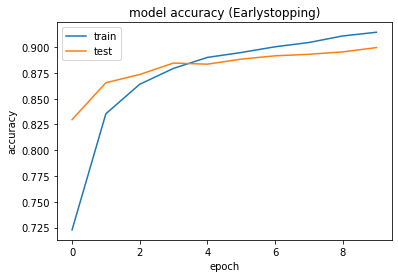

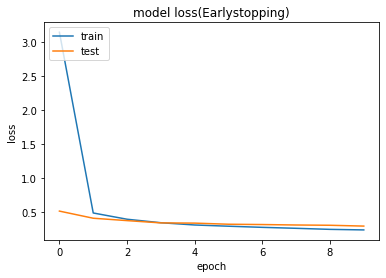

In [48]:
# Early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# fit the keras model on the dataset

historye = model.fit(trainX, trainy, batch_size=256, epochs=10, validation_data=(testX, testy), verbose=1) 

# summarize history for accuracy
plt.plot(historye.history['accuracy'])
plt.plot(historye.history['val_accuracy'])
plt.title('model accuracy (Earlystopping)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(historye.history['loss'])
plt.plot(historye.history['val_loss'])
plt.title('model loss(Earlystopping)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
118/118 [==============================] - 18s 149ms/step - loss: 0.3980 - accuracy: 0.8651 - val_loss: 0.3915 - val_accuracy: 0.8648
Epoch 2/10
118/118 [==============================] - 18s 149ms/step - loss: 0.3519 - accuracy: 0.8785 - val_loss: 0.3754 - val_accuracy: 0.8695
Epoch 3/10
118/118 [==============================] - 17s 148ms/step - loss: 0.3183 - accuracy: 0.8858 - val_loss: 0.3532 - val_accuracy: 0.8805
Epoch 4/10
118/118 [==============================] - 18s 151ms/step - loss: 0.2915 - accuracy: 0.8954 - val_loss: 0.3524 - val_accuracy: 0.8791
Epoch 5/10
118/118 [==============================] - 18s 155ms/step - loss: 0.2703 - accuracy: 0.8993 - val_loss: 0.3420 - val_accuracy: 0.8833
Epoch 6/10
118/118 [==============================] - 18s 151ms/step - loss: 0.2516 - accuracy: 0.9061 - val_loss: 0.3383 - val_accuracy: 0.8873
Epoch 7/10
118/118 [==============================] - 17s 148ms/step - loss: 0.2393 - accuracy: 0.9113 - val_loss: 0.3425 - val_ac

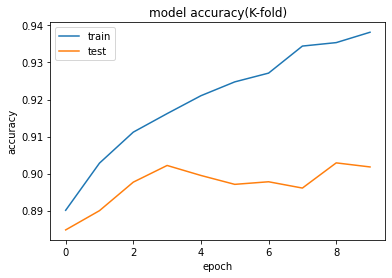

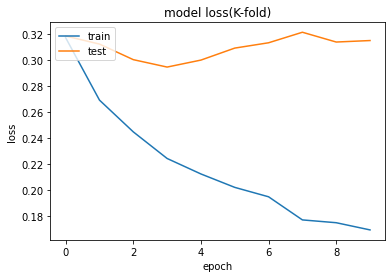

In [20]:
#K-fold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import KFold

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(trainX,trainy):
    trainXk, trainYk= trainX[train_ix], trainy[train_ix]
#     print(trainXk.shape)
#     print(trainYk.shape)
    historyk = model.fit(trainX[train_ix], trainy[train_ix], epochs=10, batch_size=256, validation_data=(testX, testy))

# summarize history for accuracy
plt.plot(historyk.history['accuracy'])
plt.plot(historyk.history['val_accuracy'])
plt.title('model accuracy(K-fold)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyk.history['loss'])
plt.plot(historyk.history['val_loss'])
plt.title('model loss(K-fold)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
188/188 [==============================] - 16s 86ms/step - loss: 0.2074 - accuracy: 0.9243 - val_loss: 0.3041 - val_accuracy: 0.9024
Epoch 2/10
188/188 [==============================] - 21s 114ms/step - loss: 0.1876 - accuracy: 0.9317 - val_loss: 0.3101 - val_accuracy: 0.8980
Epoch 3/10
188/188 [==============================] - 27s 146ms/step - loss: 0.1826 - accuracy: 0.9316 - val_loss: 0.3073 - val_accuracy: 0.9048
Epoch 4/10
188/188 [==============================] - 22s 119ms/step - loss: 0.1734 - accuracy: 0.9356 - val_loss: 0.3312 - val_accuracy: 0.8954
Epoch 5/10
188/188 [==============================] - 20s 109ms/step - loss: 0.1701 - accuracy: 0.9373 - val_loss: 0.3281 - val_accuracy: 0.8984
Epoch 6/10
188/188 [==============================] - 17s 93ms/step - loss: 0.1617 - accuracy: 0.9395 - val_loss: 0.3317 - val_accuracy: 0.9010
Epoch 7/10
188/188 [==============================] - 19s 101ms/step - loss: 0.1589 - accuracy: 0.9395 - val_loss: 0.3392 - val_accu

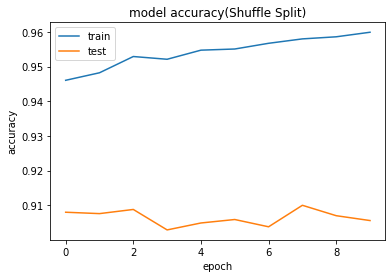

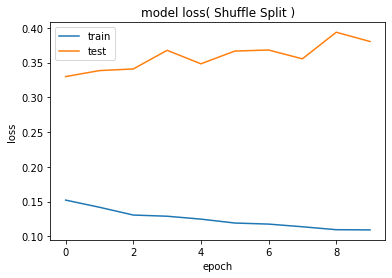

In [21]:
#  shufflesplit
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=3, test_size=.2, random_state=0)


for train, test in rs.split(trainX):
    historyh = model.fit(trainX[train],trainy[train], epochs=10, batch_size=256, validation_data=(testX, testy))
    
    # summarize history for accuracy
plt.plot(historyh.history['accuracy'])
plt.plot(historyh.history['val_accuracy'])
plt.title('model accuracy(Shuffle Split)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historyh.history['loss'])
plt.plot(historyh.history['val_loss'])
plt.title('model loss( Shuffle Split )')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
  2/157 [..............................] - ETA: 13s - loss: 0.1301 - accuracy: 0.9570

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


157/157 [==============================] - 14s 87ms/step - loss: 0.1326 - accuracy: 0.9532 - val_loss: 0.3683 - val_accuracy: 0.9049
Epoch 2/10
157/157 [==============================] - 14s 87ms/step - loss: 0.1234 - accuracy: 0.9555 - val_loss: 0.3753 - val_accuracy: 0.9049
Epoch 3/10
157/157 [==============================] - 14s 87ms/step - loss: 0.1137 - accuracy: 0.9588 - val_loss: 0.3735 - val_accuracy: 0.9082
Epoch 4/10
157/157 [==============================] - 16s 102ms/step - loss: 0.1053 - accuracy: 0.9617 - val_loss: 0.3827 - val_accuracy: 0.9086
Epoch 5/10
157/157 [==============================] - 17s 108ms/step - loss: 0.1012 - accuracy: 0.9622 - val_loss: 0.3948 - val_accuracy: 0.9054
Epoch 6/10
157/157 [==============================] - 19s 118ms/step - loss: 0.0996 - accuracy: 0.9640 - val_loss: 0.4041 - val_accuracy: 0.9017
Epoch 7/10
157/157 [==============================] - 17s 108ms/step - loss: 0.1008 - accuracy: 0.9626 - val_loss: 0.4116 - val_accuracy: 0.9036

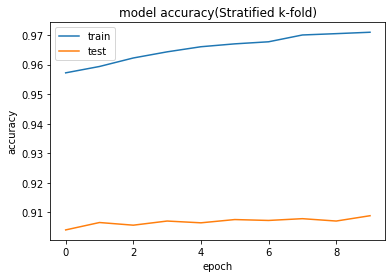

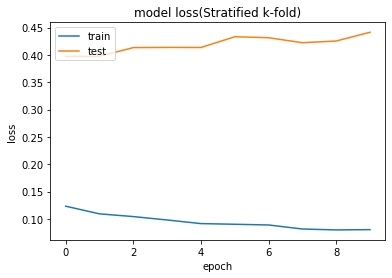

In [24]:
#Stratified k-fold
from sklearn.model_selection import StratifiedKFold, KFold
kf = KFold(n_splits=3)
skf = StratifiedKFold(n_splits=3)

for train, test in skf.split(trainX,trainy):
    historysk = model.fit(trainX[train],trainy[train], epochs=10, batch_size=256, validation_data=(testX, testy))
    
# summarize history for accuracy
plt.plot(historysk.history['accuracy'])
plt.plot(historysk.history['val_accuracy'])
plt.title('model accuracy(Stratified k-fold)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historysk.history['loss'])
plt.plot(historysk.history['val_loss'])
plt.title('model loss(Stratified k-fold)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part IV: Optimizing CNN + Data Argumentation

In [64]:
def setup(act,drop,kernel_size):
    model = tf.keras.models.Sequential()
    #first layer: convolution layer
    model.add(tf.keras.layers.Conv2D(
            filters=32, 
            kernel_size=kernel_size, 
            strides=(1, 1), 
            padding='valid', 
            activation=act, 
            input_shape=(28, 28, 1) 
        )
    )
    #Maxpool layer
    model.add(tf.keras.layers.MaxPooling2D(
           pool_size=(2, 2), 
           strides=(2, 2)
        )
    )

    #dropout to prevent from overfitting 
    model.add(tf.keras.layers.Dropout(
           rate=drop
        )
    )
    #flatten layer
    model.add(tf.keras.layers.Flatten())
    #fully connected
    model.add(tf.keras.layers.Dense(
            units=128,
            activation='relu'
        )
    )

    #output with 10 categories
    model.add(tf.keras.layers.Dense(
           units=10, 
           activation='softmax' 
        )
    )
        #loss
    model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
    )
    history = model.fit(trainX, trainy, batch_size=256, epochs=10, validation_data=(testX, testy), verbose=1) 
    return history


Epoch 1/10
235/235 [==============================] - 18s 75ms/step - loss: 0.7997 - accuracy: 0.7493 - val_loss: 0.4537 - val_accuracy: 0.8406
Epoch 2/10
235/235 [==============================] - 20s 85ms/step - loss: 0.3953 - accuracy: 0.8582 - val_loss: 0.3740 - val_accuracy: 0.8689
Epoch 3/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3422 - accuracy: 0.8779 - val_loss: 0.3224 - val_accuracy: 0.8872
Epoch 4/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3162 - accuracy: 0.8855 - val_loss: 0.3218 - val_accuracy: 0.8831
Epoch 5/10
235/235 [==============================] - 22s 93ms/step - loss: 0.2963 - accuracy: 0.8918 - val_loss: 0.3113 - val_accuracy: 0.8880
Epoch 6/10
235/235 [==============================] - 21s 88ms/step - loss: 0.2857 - accuracy: 0.8968 - val_loss: 0.2858 - val_accuracy: 0.8986
Epoch 7/10
235/235 [==============================] - 21s 89ms/step - loss: 0.2712 - accuracy: 0.9014 - val_loss: 0.2862 - val_accuracy:

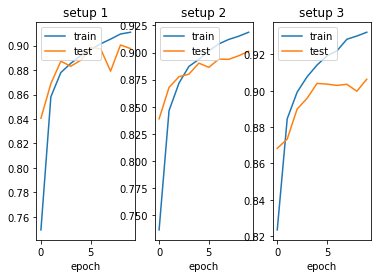

In [55]:
# setup 1-3
# summarize history for accuracy
drop = 0.25
kernel_size = (3,3)
act = 'sigmoid'
history1 = setup(act,drop,kernel_size)
act = 'relu'
history2 = setup(act,drop,kernel_size)
act = 'tanh'
history3 = setup(act,drop,kernel_size)


plt.subplot(131)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('setup 1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(132)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('setup 2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(133)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('setup 3')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
235/235 [==============================] - 25s 105ms/step - loss: 0.4816 - accuracy: 0.8364 - val_loss: 0.3449 - val_accuracy: 0.8743
Epoch 2/10
235/235 [==============================] - 32s 138ms/step - loss: 0.2841 - accuracy: 0.8949 - val_loss: 0.3013 - val_accuracy: 0.8931
Epoch 3/10
235/235 [==============================] - 29s 122ms/step - loss: 0.2494 - accuracy: 0.9075 - val_loss: 0.3010 - val_accuracy: 0.8904
Epoch 4/10
235/235 [==============================] - 21s 88ms/step - loss: 0.2170 - accuracy: 0.9200 - val_loss: 0.2575 - val_accuracy: 0.9042
Epoch 5/10
235/235 [==============================] - 20s 83ms/step - loss: 0.1973 - accuracy: 0.9272 - val_loss: 0.2799 - val_accuracy: 0.8981
Epoch 6/10
235/235 [==============================] - 19s 82ms/step - loss: 0.1804 - accuracy: 0.9336 - val_loss: 0.2606 - val_accuracy: 0.9059
Epoch 7/10
235/235 [==============================] - 19s 82ms/step - loss: 0.1715 - accuracy: 0.9353 - val_loss: 0.2524 - val_accura

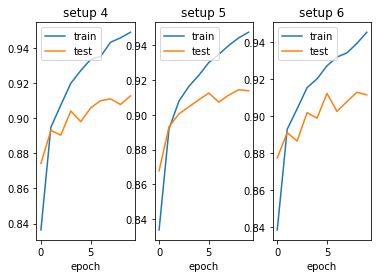

In [59]:
# summarize history for accuracy
act = 'tanh'
kernel_size = (3,3)
drop = 0.1
history4 = setup(act,drop,kernel_size)
drop = 0.15
history5 = setup(act,drop,kernel_size)
drop = 0.25
history6 = setup(act,drop,kernel_size)


plt.subplot(131)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('setup 4')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(132)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('setup 5')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(133)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('setup 6')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/10
235/235 [==============================] - 18s 76ms/step - loss: 0.5007 - accuracy: 0.8285 - val_loss: 0.3442 - val_accuracy: 0.8767
Epoch 2/10
235/235 [==============================] - 22s 93ms/step - loss: 0.3005 - accuracy: 0.8910 - val_loss: 0.3020 - val_accuracy: 0.8874
Epoch 3/10
235/235 [==============================] - 24s 100ms/step - loss: 0.2580 - accuracy: 0.9049 - val_loss: 0.3071 - val_accuracy: 0.8908
Epoch 4/10
235/235 [==============================] - 28s 120ms/step - loss: 0.2301 - accuracy: 0.9150 - val_loss: 0.2853 - val_accuracy: 0.8969
Epoch 5/10
235/235 [==============================] - 27s 115ms/step - loss: 0.2085 - accuracy: 0.9225 - val_loss: 0.2738 - val_accuracy: 0.9004
Epoch 6/10
235/235 [==============================] - 26s 112ms/step - loss: 0.1922 - accuracy: 0.9291 - val_loss: 0.2554 - val_accuracy: 0.9062
Epoch 7/10
235/235 [==============================] - 21s 88ms/step - loss: 0.1785 - accuracy: 0.9327 - val_loss: 0.2632 - val_accur

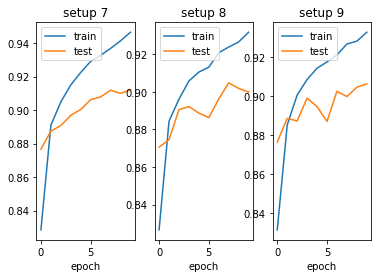

In [60]:
# summarize history for accuracy
act = 'tanh'
drop = 0.1
kernel_size = (3,3)
history7 = setup(act,drop,kernel_size)
kernel_size = (4,4)
history8 = setup(act,drop,kernel_size)
kernel_size = (5,5)
history9 = setup(act,drop,kernel_size)


plt.subplot(131)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('setup 7')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(132)
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('setup 8')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(133)
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('setup 9')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [203]:
dataX1 = np.array([])
dataX2 = np.array([])
dataX3 = np.array([])
dataX4 = np.array([])
dataX5 = np.array([])
dataX6 = np.array([])

In [225]:
dataX6 = np.array([])
all = 10000
cf = 0.5
for i in range(all):
    augmented_image = tf.image.central_crop(trainX[i+all*5], central_fraction=cf)
    augmented_image = tf.image.resize(augmented_image, [28,28])
    dataX6 = np.append(dataX6,np.array(augmented_image))
    if i == 0:
        print("0 %")
    elif i == all*0.1:
        print("10 %")
    elif i == all*0.2:
        print("20 %")
    elif i == all*0.3:
        print("30 %")
    elif i == all*0.4:
        print("40 %")
    elif i == all*0.5:
        print("50 %")
    elif i == all*0.6:
        print("60 %")
    elif i == all*0.7:
        print("70 %")
    elif i == all*0.8:
        print("80 %")
    elif i == all*0.9:
        print("90 %")
    elif i == all-1:
        print("100 %")

0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


In [228]:
DataX = trainX
DataX = np.append(DataX,np.array(dataX1))
DataX = np.append(DataX,np.array(dataX2))
DataX = np.append(DataX,np.array(dataX3))
DataX = np.append(DataX,np.array(dataX4))
DataX = np.append(DataX,np.array(dataX5))
DataX = np.append(DataX,np.array(dataX6))
DataX = np.append(DataX,DataX)
print(DataX.shape)
# print(i)
# print(j)
DataX = np.reshape(DataX,(240000,28,28))
print(DataX.shape)

Datay = np.append(trainy,trainy)
Datay = np.append(Datay,Datay)
print(Datay.shape)

DataX = np.expand_dims(DataX, -1)
print(DataX.shape)

(188160000,)
(240000, 28, 28)
(240000,)
(240000, 28, 28, 1)


In [229]:
model = tf.keras.models.Sequential()
#first layer: convolution layer
model.add(tf.keras.layers.Conv2D(
        filters=32, 
        kernel_size=(3, 3), 
        strides=(1, 1), 
        padding='valid', 
        activation='tanh', 
        input_shape=(28, 28, 1) 
    )
)
#Maxpool layer
model.add(tf.keras.layers.MaxPooling2D(
       pool_size=(2, 2), 
       strides=(2, 2)
    )
)

#dropout to prevent from overfitting 
model.add(tf.keras.layers.Dropout(
       rate=0.1
    )
)
#flatten layer
model.add(tf.keras.layers.Flatten())
#fully connected
model.add(tf.keras.layers.Dense(
        units=128,
        activation='relu'
    )
)

#output with 10 categories
model.add(tf.keras.layers.Dense(
       units=10, 
       activation='softmax' 
    )
)
    #loss
model.compile(
loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
optimizer=tf.keras.optimizers.Adam(), # optimizer function
metrics=['accuracy'] # reporting metric
)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:4211: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
938/938 [==============================] - 77s 81ms/step - loss: 0.5752 - accuracy: 0.7949 - val_loss: 0.3123 - val_accuracy: 0.8866
Epoch 2/10
938/938 [==============================] - 78s 84ms/step - loss: 0.4093 - accuracy: 0.8490 - val_loss: 0.2898 - val_accuracy: 0.8962
Epoch 3/10
938/938 [==============================] - 83s 88ms/step - loss: 0.3644 - accuracy: 0.8655 - val_loss: 0.2785 - val_accuracy: 0.9053
Epoch 4/10
938/938 [==============================] - 81s 86ms/step - loss: 0.3362 - accuracy: 0.8751 - val_loss: 0.2773 - val_accuracy: 0.9049
Epoch 5/10
938/938 [==============================] - 83s 88ms/step - loss: 0.3150 - accuracy: 0.8831 - val_loss: 0.2739 - val_accuracy: 0.9140
Epoch 6/10
938/938 [==============================] - 85s 91ms/step - loss: 0.2924 - accuracy: 0.8912 - val_loss: 0.2808 - val_accuracy: 0.9093
Epoch 7/10
938/938 [==============================] - 87s 93ms/step - loss: 0.2814 - accuracy: 0.8947 - val_loss: 0.3088 - val_accuracy:

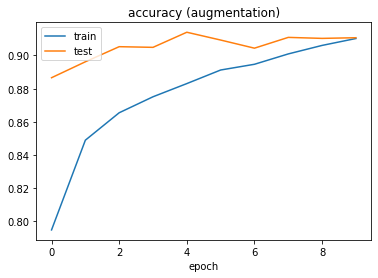

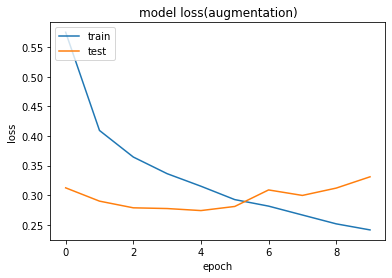

In [230]:
historyag = model.fit(DataX, Datay, batch_size=256, epochs=10, validation_data=(testX, testy), verbose=1) 

plt.plot(historyag.history['accuracy'])
plt.plot(historyag.history['val_accuracy'])
plt.title('accuracy (augmentation)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(historyag.history['loss'])
plt.plot(historyag.history['val_loss'])
plt.title('model loss(augmentation)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
